# Project: **Data Jobs Salaries in Mexico on August 2022**
___
___
## **3. Data Analysis and Visualization**
___

Author: **Daniel Eduardo López**

GitHub: **_https://github.com/DanielEduardoLopez_**

LinkedIn: **_https://www.linkedin.com/in/daniel-eduardo-lopez_**

Email: **_daniel-eduardo-lopez@outlook.com_**
___

The purpose of the present notebook is to perform the **Data Analysis and Visualization** of the cleaned dataset in order to answer the main research question as well as obtaining further insights from the data.

**Main Question:**
Which data job category has the highest salary in the Mexican labor market in August 2022 according to the OCC website?
- Business Analyst
- Data Analyst
- Data Architect
- Data Engineer
- Data Scientist

It is hypothesed that **Data Scientist** positions are the ones with the highest salaries as per the famous statement that Data Science is "The Sexiest Job of the 21st Century" (Davenport & Patil, 2012). Nonetheless, that was confirmed or rejected with factual data below.

To do so, first, the dataset was loaded to a Pandas dataframe. Then, the data was analyzed through some descriptive statistical calculations with Pandas and Numpy libraries. Moreover, to gain further understanding and insights through visualizations, the Matplotlib, Seaborn and Folium libraries were used.


**References:**

**Davenport, T.H. & Patil, D.J. (2012). ** *Data Scientist: The Sexiest Job of the 21st Century*. Harvard Business Review 90(10): 70-76.

### **1. Data loading**
___

In [1]:
#!pip install folium
#!pip install squarify

In [2]:
# Libraries importation
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify

In [3]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster

In [4]:
# For a ggplot-like plotting style
mpl.style.use('ggplot') 

In [5]:
# Loading of the dataframe with the cleaned data
df = pd.read_csv('Dataset_Clean.csv')

### **2. What is the Most Demanded Data Job?**
___

In [6]:
# Basic info of the first dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             444 non-null    object 
 1   Company         444 non-null    object 
 2   Location        444 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.0+ KB


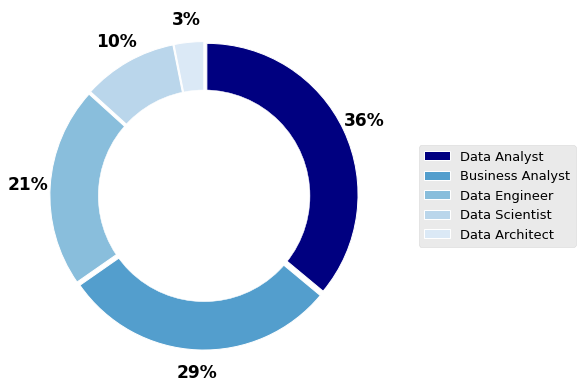

In [7]:
# Donut chart of the data jobs demand
fig, ax = plt.subplots(figsize = (9, 14))
colors = sns.color_palette('Blues_r')
explode = [0.02] * 5
wedges, texts, autotexts = ax.pie(x = list(df['Job'].value_counts().values), wedgeprops=dict(edgecolor='w', linewidth= 1),
        textprops = dict(size=17, weight="bold", color = 'black'), colors = ['navy',colors[2],colors[3],colors[4],colors[5]], 
        autopct='%.0f%%', pctdistance=1.15, startangle = 90, counterclock = False, explode = explode)
center = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(center)
plt.legend(wedges, list(df['Job'].value_counts().keys()), fontsize=13, loc="center right", bbox_to_anchor=(1.2, 0, 0.3, 1))
plt.tight_layout()
plt.show()

From the above plot, it is possible to conclude that more than a third of the data jobs (**36%**) correspond to positions of **Data Analyst**, rendering them as **the most demanded** ones in the Mexican labor market at the time of this study (August 2022). In second place, it is possible to found the positions of **Business Analyst** with a **29%** of the total. 

Furthermore, it is noteworthy that **Data Engineer** positions are more demanded than **Data Scientist** positions with a **21%** and an **10%**, respectively. 

On the contrary, **Data Architect** positions are the less demanded, with only a **3%** out of the total.



### **3. Where do the Most Data Jobs Locate?**
___

In [8]:
# States dictionary with corresponding ID
states_dict = {'Aguascalientes': 'AS', 
            'Baja California': 'BC', 
            'Baja California Sur': 'BS', 
            'Campeche': 'CC',
            'Ciudad de México':'DF',
            'Chiapas': 'CS',
            'Chihuahua':'CH',
            'Coahuila':'CL',
            'Colima':'CM',
            'Durango':'DG',
            'Estado de México':'MC',
            'Guanajuato':'GT',
            'Guerrero':'GR',
            'Hidalgo':'HG',
            'Jalisco':'JC',
            'Michoacán':'MN',
            'Morelos':'MS',
            'Nayarit':'NT',
            'Nuevo León':'NL',
            'Oaxaca':'OC',
            'Puebla':'PL',
            'Querétaro':'QT',
            'Quintana Roo':'QR',
            'San Luis Potosí':'SP',
            'Sinaloa':'SL',
            'Sonora':'SR',
            'Tabasco':'TC',
            'Tamaulipas':'TS',
            'Tlaxcala':'TL',
            'Veracruz':'VZ',
            'Yucatán':'YN',
            'Zacatecas':'ZS'}

states_df = pd.DataFrame.from_dict(states_dict, orient='index').reset_index().rename(columns={"index": "State", 0: "ID"}).set_index('State')
states_df.head()

,ID
State,
Aguascalientes,AS
Baja California,BC
Baja California Sur,BS
Campeche,CC
Ciudad de México,DF


In [9]:
# Calculating the Demand Percentage per State

demand = pd.DataFrame(df['Location'].value_counts())
total = sum(demand['Location'])
demand['Percentage'] = (demand['Location']) / total *100
demand = demand.reset_index().rename(columns={"index": "State", "Location": "Count"})
demand.head()


,State,Count,Percentage
0,Ciudad de México,260,58.558559
1,Nuevo León,58,13.063063
2,Estado de México,56,12.612613
3,Jalisco,24,5.405405
4,Querétaro,16,3.603604


In [10]:
# Final DataFrame for the Chloropleth visualization
states_df = states_df.merge(demand, left_on='State', right_on='State', how = 'outer').fillna(0)
states_df.head()

,State,ID,Count,Percentage
0,Aguascalientes,AS,1.0,0.225225
1,Baja California,BC,2.0,0.450450
2,Baja California Sur,BS,0.0,0.000000
3,Campeche,CC,0.0,0.000000
4,Ciudad de México,DF,260.0,58.558559


In [11]:
# Mexican States Latitude and Longitud

states_lat_long_dict = {'Aguascalientes': (21.87945992,	-102.2904135),
                  'Baja California': (32.663214,-115.4903741),
                  'Baja California Sur': (24.1584937,-110.315928),
                  'Campeche': (19.8450352,-90.5381231),
                  'Chiapas': (16.7541485,-93.119001),
                  'Chihuahua': (28.6349557,-106.0777049),
                  'Coahuila': (25.4286965,-100.9994484),
                  'Colima': (19.2408324,-103.7291389),
                  'Ciudad de México': (19.4335493,-99.1344048),
                  'Durango': (24.0241017,-104.6708325),
                  'Guanajuato': (21.0176446,-101.2586863),
                  'Guerrero': (17.5516921,-99.5025877),
                  'Hidalgo': (20.1183855,-98.7540094),
                  'Jalisco': (20.6773775,-103.3494204),
                  'Estado de México': (19.289191,-99.6670425),
                  'Michoacán': (19.7030535,-101.1937953),
                  'Morelos': (18.9218499,-99.2353856),
                  'Nayarit': (21.5122308,-104.8948845),
                  'Nuevo León': (25.6717637,-100.3163831),
                  'Oaxaca': 	(17.0617935,-96.7271634),
                  'Puebla': (19.0428817,-98.2002919),
                  'Querétaro': (20.37998212,	-100.0000308),
                  'Quintana Roo': (18.4978052,-88.3029951),
                  'San Luis Potosí': (22.1521646,-100.9765552),
                  'Sinaloa': (24.8082702,-107.3945828),
                  'Sonora': (29.0748734,-110.9597578),
                  'Tabasco': (17.9882632,-92.9209807),
                  'Tamaulipas': (23.7312703,-99.1517694),
                  'Tlaxcala': (19.3171271,-98.2386354),
                  'Veracruz': (19.5269375,-96.92401),
                  'Yucatán': (20.9664386,-89.623114),
                  'Zacatecas': (22.7753476,-102.5740002)}
                
states_lat_long = pd.DataFrame.from_dict(states_lat_long_dict, orient='index').reset_index().rename(columns={"index": "State", 0: "Lat", 1: "Long"}).set_index('State')
states_lat_long.head()

,Lat,Long
State,,
Aguascalientes,21.879460,-102.290413
Baja California,32.663214,-115.490374
Baja California Sur,24.158494,-110.315928
Campeche,19.845035,-90.538123
Chiapas,16.754148,-93.119001


In [12]:
# Join of the job data dataframe with the Mexican States latitude and longitud
jobs_loc = df.merge(states_lat_long, left_on='Location', right_on='State', how = 'inner')
jobs_loc.head()

,Job,Company,Location,Average Salary,Lat,Long
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0,19.433549,-99.134405
1,Data Analyst,Corporativo Mek De México,Ciudad de México,NaN,19.433549,-99.134405
2,Data Analyst,Fidelity Marketing S.A De C.V,Ciudad de México,NaN,19.433549,-99.134405
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0,19.433549,-99.134405
4,Data Analyst,Laboratorios Médicos Del Chopo,Ciudad de México,NaN,19.433549,-99.134405


In [13]:
# Function to assign job color
def assign_job_color(job):
  if job == 'Data Analyst':
    return 'blue'
  elif job == 'Business Analyst':
    return 'green'
  elif job == 'Data Engineer':
    return 'black'
  elif job == 'Data Scientist':
    return 'red'
  elif job == 'Data Architect':
    return 'yellow'


In [14]:
# Assigning of different colors to the different job categories
jobs_loc['Marker Color'] = jobs_loc['Job'].apply(assign_job_color)
jobs_loc.head()

,Job,Company,Location,Average Salary,Lat,Long,Marker Color
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0,19.433549,-99.134405,blue
1,Data Analyst,Corporativo Mek De México,Ciudad de México,NaN,19.433549,-99.134405,blue
2,Data Analyst,Fidelity Marketing S.A De C.V,Ciudad de México,NaN,19.433549,-99.134405,blue
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0,19.433549,-99.134405,blue
4,Data Analyst,Laboratorios Médicos Del Chopo,Ciudad de México,NaN,19.433549,-99.134405,blue


In [15]:
# Initialization of map
m = folium.Map(location=[24,-105], zoom_start=5)

# Setting of the Choropleth
folium.Choropleth(
    geo_data = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json',
    name = "Data Jobs Localization",
    data = states_df,
    columns = ["ID", "Percentage"],
    key_on = "feature.id",
    fill_color = "Blues",
    fill_opacity = 0.7,
    line_opacity = 0.1,
    legend_name = "Data Jobs Demand (%)",
).add_to(m)

marker_cluster = MarkerCluster()
m.add_child(marker_cluster)

# Adding of individual markers to clusters
for index, record in jobs_loc.iterrows():
    marker = folium.Marker(list(record[4:6]),
                           icon = folium.Icon(color='white', icon_color=str(record[-1])))
    marker_cluster.add_child(marker)

# Setting of the Layer Control
folium.LayerControl().add_to(m)

# Showing the map
m


The above map strongly suggests that **most of the data jobs are concentrated in the capital Mexico City** with almost **60%** of the demand at the moment of this study (August 2022). 

On the other hand, according to the data, **Nuevo León**, and **State of Mexico** (**"Estado de México"** in Spanish) represent distant second places, with only about **13%** of the total demand.

**Reference for JSON file:**

**Arroyo-Velázquez, M. I. (2022)**. _states_mx_. https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json

## **3. How is the Data Jobs Demand Per State?**
___

In [16]:
# Data jobs per State
jobs_per_state_pivot = df.pivot_table(index = 'Location', columns = 'Job', values = 'Company', aggfunc = 'count').fillna(0).reset_index()
jobs_per_state_pivot['Total'] = jobs_per_state_pivot.sum(axis=1, numeric_only= True)
jobs_per_state_pivot = jobs_per_state_pivot.sort_values('Total', ascending = True)
jobs_per_state_pivot.head()

Job,Location,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total
0,Aguascalientes,1.0,0.0,0.0,0.0,0.0,1.0
15,Tamaulipas,0.0,1.0,0.0,0.0,0.0,1.0
14,Sonora,1.0,0.0,0.0,0.0,0.0,1.0
9,Oaxaca,0.0,1.0,0.0,0.0,0.0,1.0
12,Quintana Roo,1.0,1.0,0.0,0.0,0.0,2.0


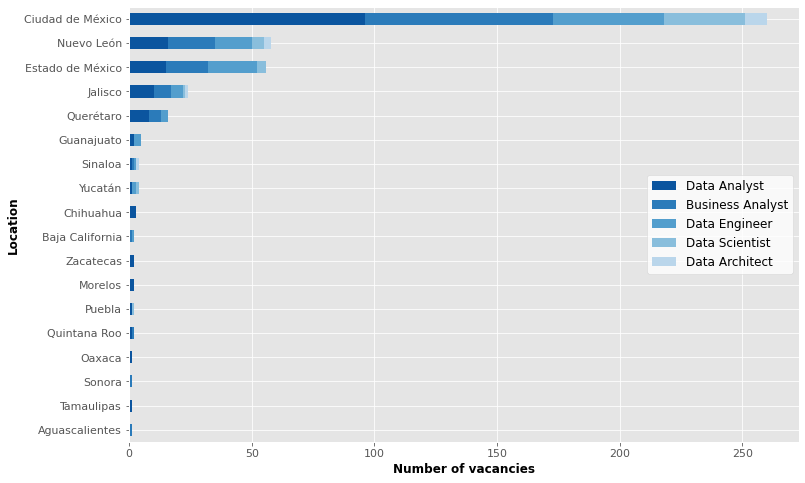

In [17]:
# Stack bar chart of Data jobs per State
jobs_per_state_pivot.set_index('Location').plot.barh(stacked=True, 
                                                     y = ['Data Analyst',	'Business Analyst',	'Data Engineer','Data Scientist', 'Data Architect'], 
                                                     color=sns.color_palette('Blues_r'),
                                                     figsize=(12, 8) )
plt.legend(facecolor = 'white', loc = 'center right', fontsize = 12)
plt.xlabel('Number of vacancies', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

In [18]:
# Unpivoting the table
jobs_per_state_selected = jobs_per_state_pivot.loc[(jobs_per_state_pivot['Location'] == 'Ciudad de México') 
                                          | (jobs_per_state_pivot['Location'] == 'Estado de México') 
                                          | (jobs_per_state_pivot['Location'] == 'Jalisco') 
                                          | (jobs_per_state_pivot['Location'] == 'Nuevo León')].sort_values('Total', ascending = False)
jobs_per_state_selected = pd.melt(jobs_per_state_selected, id_vars= 'Location', value_vars = ['Business Analyst',	'Data Analyst',	'Data Architect',	'Data Engineer','Data Scientist'], var_name= 'Data Job', value_name='Count')
jobs_per_state_selected.head()

,Location,Data Job,Count
0,Ciudad de México,Business Analyst,77.0
1,Nuevo León,Business Analyst,19.0
2,Estado de México,Business Analyst,17.0
3,Jalisco,Business Analyst,7.0
4,Ciudad de México,Data Analyst,96.0


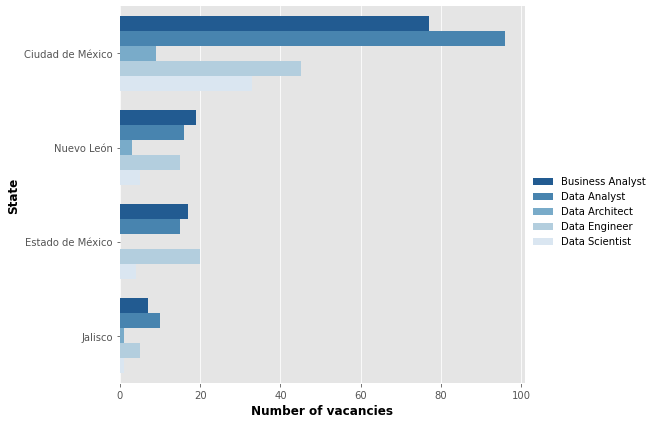

In [19]:
# Grouped bar chart of each data job for selected states
g = sns.catplot(
    data = jobs_per_state_selected, kind = "bar",
    x = "Count", y = "Location", hue = "Data Job",
    ci = "sd", palette = "Blues_r", alpha = 1, height = 6,
    aspect = 1.3
)
g.despine(left=True)
g.set_axis_labels("Number of vacancies", "State", weight="bold", color = 'black')
g.legend.set_title("")


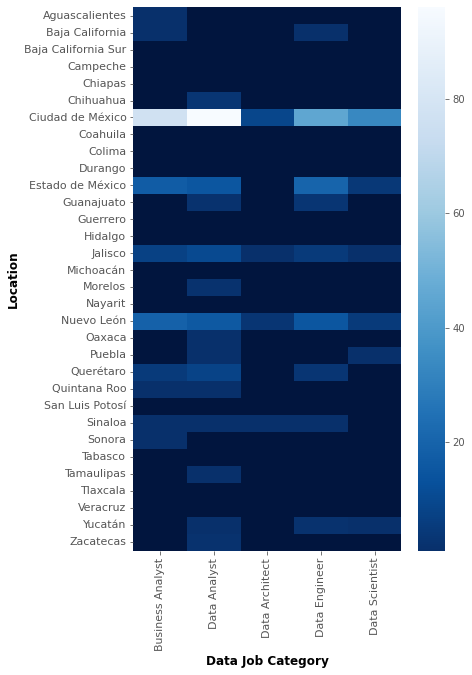

In [20]:
# Heatmap of Data jobs per State
heatmap_data = jobs_per_state_pivot.set_index('Location').merge(states_df, left_on='Location', right_on='State', how = 'outer').fillna(0).drop(columns = ['Total','ID',	'Count','Percentage']).sort_values('State', ascending = True).set_index('State')
plt.figure(figsize = (6,10))
hm = sns.heatmap(heatmap_data, 
            cmap = "Blues_r",
            mask = (heatmap_data == 0))
hm.set_facecolor('xkcd:navy')
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

From the plots above, it is possible to observe that, undoubtly, **Mexico City**, **Nuevo León**,  **Estado de México**, and **Jalisco** are the locations where most of the data jobs are demanded, while the rest of the country is lagging behind in terms of data jobs creation.

However, it is important to remark that the data jobs demand is largely concentrated in **Mexico City**, whereas **Nuevo León**,  **Estado de México**, and **Jalisco** are distant second, third and fourth places, respectively.

Moreover, it is noteworthy that the **Data Analyst** position is the one most demanded across the Mexican States; whereas **Data Architect** is the less demanded.



## **4. What are the Companies Demanding More Data Jobs?**
___

In [21]:
# Pivot table by company
company_df = pd.pivot_table(data = df, index = 'Company', columns = 'Job', values = 'Location', aggfunc = 'count').fillna(0).reset_index()
company_df['Total'] = company_df.sum(axis=1, numeric_only= True)
company_df = company_df.sort_values('Total', ascending = False)
company_df.head()

Job,Company,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total
24,Banamex,23.0,15.0,1.0,6.0,3.0,48.0
202,Softtek,5.0,6.0,1.0,4.0,1.0,17.0
89,Grupo Salinas,2.0,8.0,1.0,1.0,1.0,13.0
2,Adecco,0.0,5.0,0.0,1.0,3.0,9.0
26,Banorte,0.0,5.0,0.0,0.0,4.0,9.0


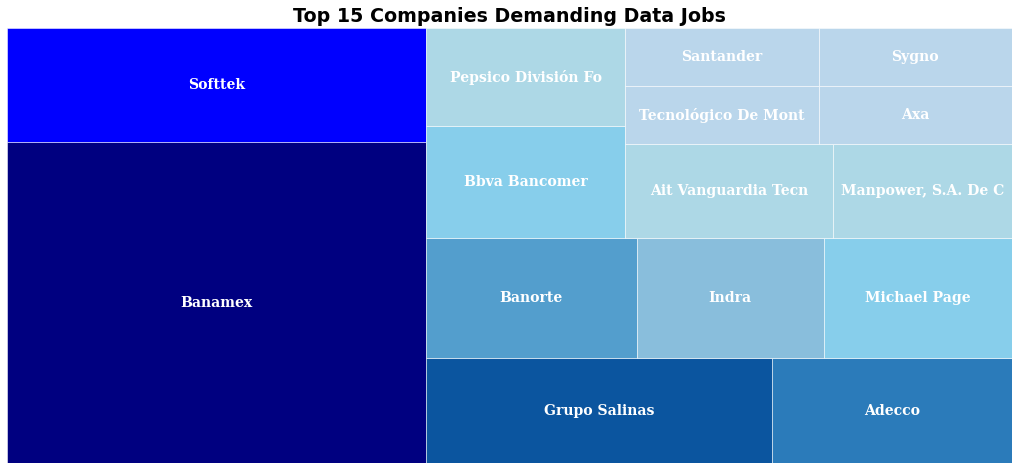

In [44]:
# Treemap
top = 15
sizes = company_df['Total'][:top].values
label = company_df['Company'][:top].map(lambda x: x[:19])
colors = sns.color_palette('Blues_r')
colors_tree =['navy', 'blue', colors[0], colors[1], colors[2], colors[3], 'skyblue', 'skyblue', 'lightblue', 'lightblue', 'lightblue', colors[4], colors[4], colors[4], colors[4]]
plt.figure(figsize = (18,8))
squarify.plot(sizes = sizes, label = label, 
              alpha = 1, color = colors_tree, pad = 0, 
              text_kwargs={'fontsize': 14, 'weight': 'bold', 'family':'serif', 'color': 'w'},
              edgecolor = 'w')
plt.title('Top 15 Companies Demanding Data Jobs', weight = 'bold', fontsize = 19)
plt.axis('Off')
plt.show()

From the plot above, it is clear that **Banamex**, **Softek** and **Grupo Salinas** are the companies with **the highest data jobs demand** at the moment of the present study. So, even though, the data jobs demand may vary along time, the current interest of such companies in data science and analytics might convert them in interesting prospects for job seekers.

It is also noteworthy that 4 banks (Banamex, Banorte, BBVA Bancomer and Satander) are part from the top 15, which suggest that **the banking sector in Mexico** is currently very interested in capitalize the huge amounts of data that their clients produce every day.

## **5. How is the Data Jobs Demand Per Company?**
___

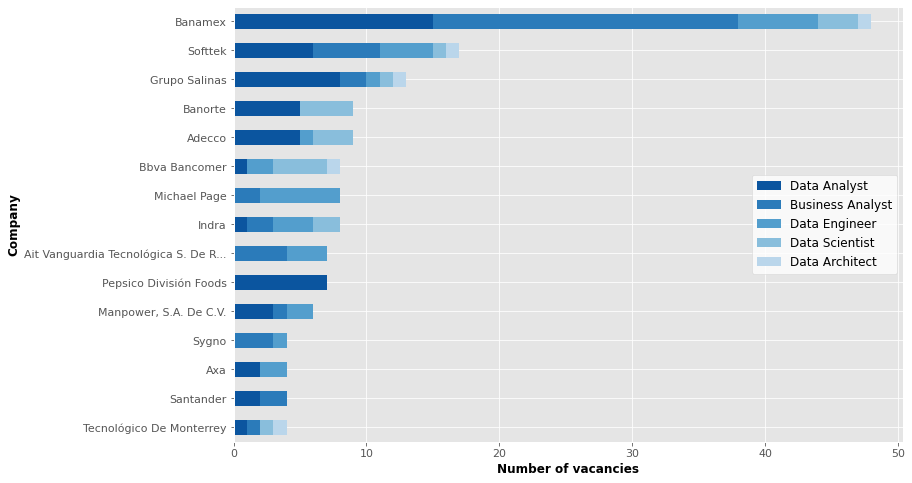

In [23]:
# Top 10 Companies Demanding Data Jobs 
company_df[:15].sort_values('Total', ascending = True).set_index('Company').drop(columns = 'Total').plot.barh(stacked=True, 
                                                     y = ['Data Analyst',	'Business Analyst',	'Data Engineer','Data Scientist', 'Data Architect'], 
                                                     color=sns.color_palette('Blues_r'),
                                                     figsize=(12, 8) )
plt.legend(facecolor = 'white', loc = 'center right', fontsize = 12)
plt.xlabel('Number of vacancies', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Company', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid({'both'})
plt.show()

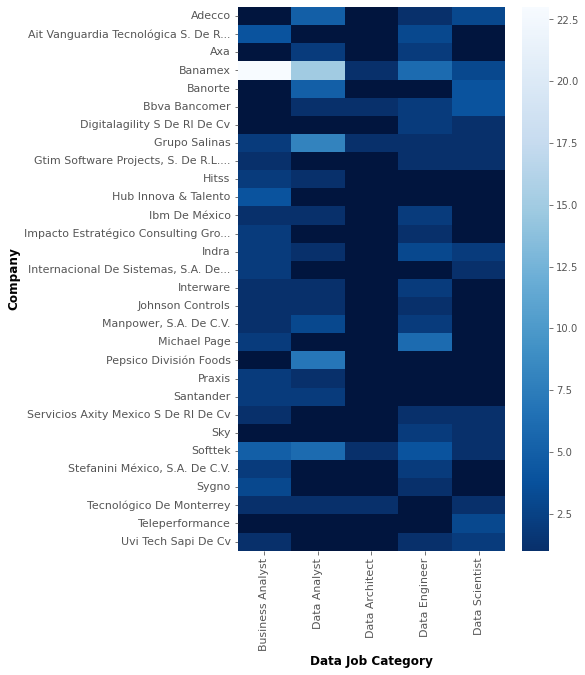

In [24]:
# Heatmap of the top 30 companies demanding data jobs
heatmap_companies = company_df[:30].set_index('Company').drop(columns = 'Total').sort_values('Company', ascending = True)
plt.figure(figsize = (6,10))
hm = sns.heatmap(heatmap_companies, 
            cmap = "Blues_r",
            mask = (heatmap_companies == 0))
hm.set_facecolor('xkcd:navy')
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Company', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

From the plots above, it is possible to see that, indeed, **Data Analyst** and **Business Analyst** positions are the ones **most demanded** by the companies in Mexico at the moment of this study; whereas **Data Architect** positions are the **less demanded**.

Notwithstanding with the above, the heatmap suggests that **Business Analyst** and **Data Engineer** positions are more demanded across different organizations. On the contrary, **Data Scientist** and, certainly, **Data Architect** vacancies can be found in more specific organizations like tech companies and banks.



## **6.  Where do the companies locate?**
___

In [25]:
# Base data wrangling for heatmaps
comp_loc = pd.pivot_table(data = df, index = 'Company', columns = 'Location', values = 'Job', aggfunc = 'count').transpose().merge(states_df, left_on='Location', right_on='State', how = 'outer').set_index('State').drop(columns =['ID', 'Count', 'Percentage']).transpose().fillna(0)
comp_loc['Total'] = comp_loc.sum(axis=1, numeric_only= True)

# Data with all the companies collected
comp_loc_total = comp_loc.sort_values('Total', ascending = False).drop(columns = 'Total').reset_index().rename(columns = {'index': 'Company'}).sort_values('Company', ascending = True).set_index('Company').astype(float).transpose().sort_values('State')
comp_loc_total.head()


Company,3F Bienestar Emocional Sa De Cv,"Acepte Soluciones Integrales, S. D...",Adecco,Administración Integral Firpo Izca...,"Aig Seguros Mexico, Sa De C.V.",Ait Vanguardia Tecnológica S. De R...,Alicia Angelica Vazquez Espinoza,"American Express Company México, S...",Anzen Soluciones S.A. De C.V.,Aon Risk Solutions Agente De Segur...,...,Universidad Univer Milenium Del Es...,Ust Global,Uvi Tech Sapi De Cv,Vertiv Mexico,Vidanta,Wiggot Evolucion Inmobiliaria Sapi...,"Wipro Technologies, S.A. De C.V.",Wpp Business Services,"Xaalsa Empresarial, S.A. De C.V.",Zegovia Rh Sa De Cv
State,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baja California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baja California Sur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Campeche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chiapas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Data with only the top 30 companies
comp_loc_top = comp_loc.sort_values('Total', ascending = False)[:30].drop(columns = 'Total').reset_index().rename(columns = {'index': 'Company'}).sort_values('Company', ascending = True).set_index('Company').astype(float)
comp_loc_top.head()


State,Aguascalientes,Baja California,Chihuahua,Ciudad de México,Estado de México,Guanajuato,Jalisco,Morelos,Nuevo León,Oaxaca,...,Colima,Durango,Guerrero,Hidalgo,Michoacán,Nayarit,San Luis Potosí,Tabasco,Tlaxcala,Veracruz
Company,,,,,,,,,,,,,,,,,,,,,
Adecco,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ait Vanguardia Tecnológica S. De R...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Axa,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banamex,0.0,0.0,0.0,43.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banorte,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


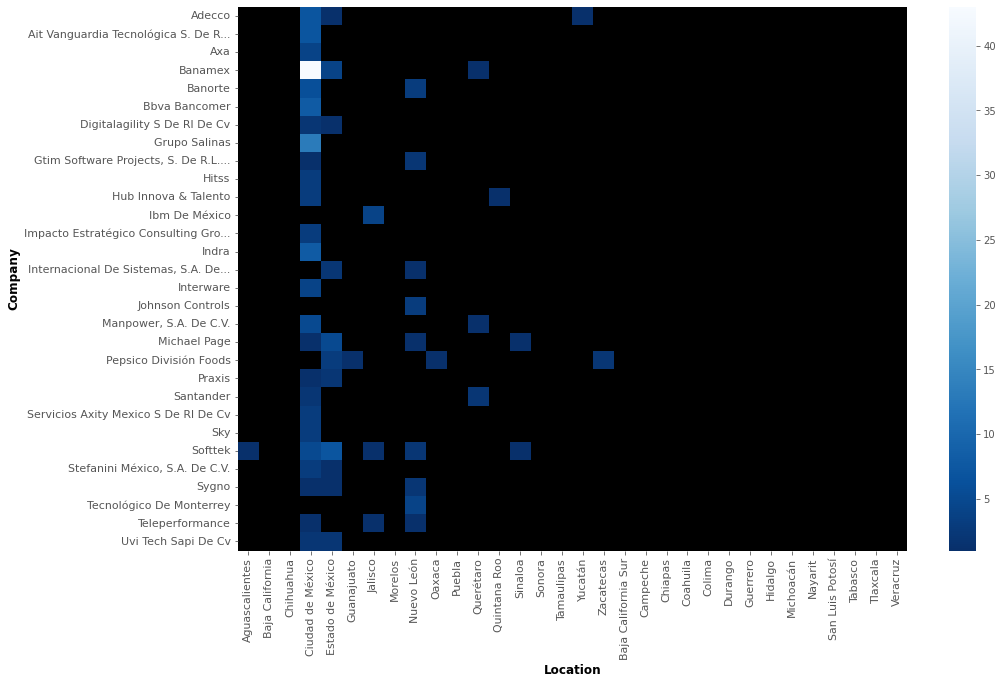

In [27]:
# Heatmap of the top 30 companies demanding data jobs and their locations
plt.figure(figsize = (15,10))
hm = sns.heatmap(comp_loc_top, 
            cmap = "Blues_r",
            mask = (comp_loc_top == 0))
hm.set_facecolor('xkcd:black')
plt.xlabel('Location', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Company', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

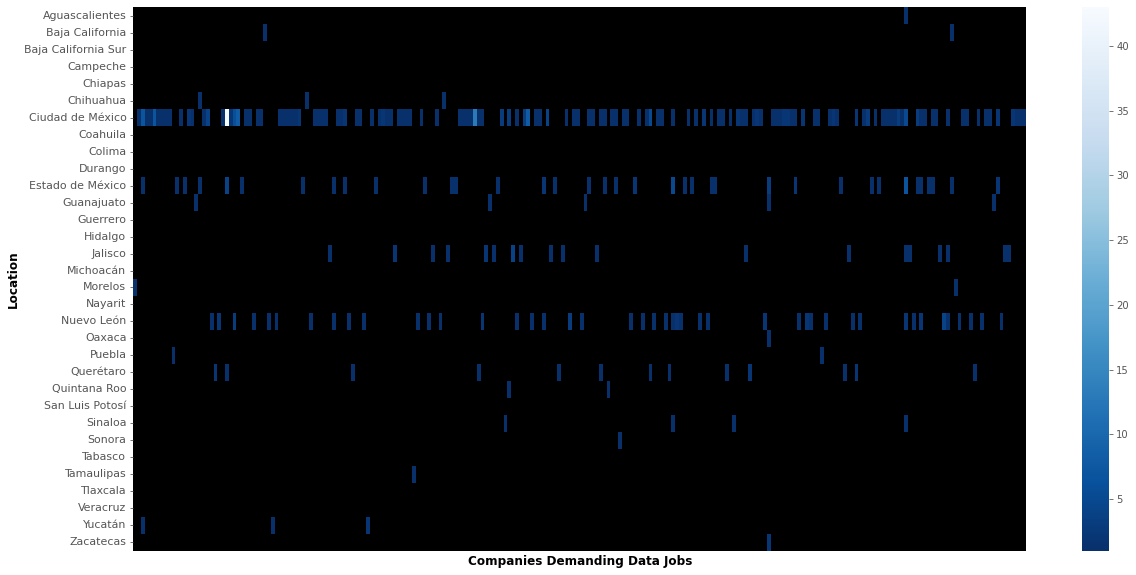

In [28]:
# Heatmap of all companies demanding data jobs and their locations
plt.figure(figsize = (20,10))
hm = sns.heatmap(comp_loc_total, 
            cmap = "Blues_r",
            mask = (comp_loc_total == 0))
hm.set_facecolor('xkcd:black')
plt.xlabel('Companies Demanding Data Jobs', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks([])
plt.yticks(fontsize = 11)
plt.show()

## **7. Which Data Job Category Has the Highest Salaries?**
___

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             444 non-null    object 
 1   Company         444 non-null    object 
 2   Location        444 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.0+ KB


In [30]:
salary_df = df.dropna(axis = 0, how='any', subset = ['Average Salary'])
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 441
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             157 non-null    object 
 1   Company         157 non-null    object 
 2   Location        157 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.1+ KB


In [31]:
salary_df.describe()

,Average Salary
count,157.000000
mean,31179.347134
std,18589.329627
min,6000.000000
25%,17500.000000
50%,28500.000000
75%,42000.000000
max,95000.000000


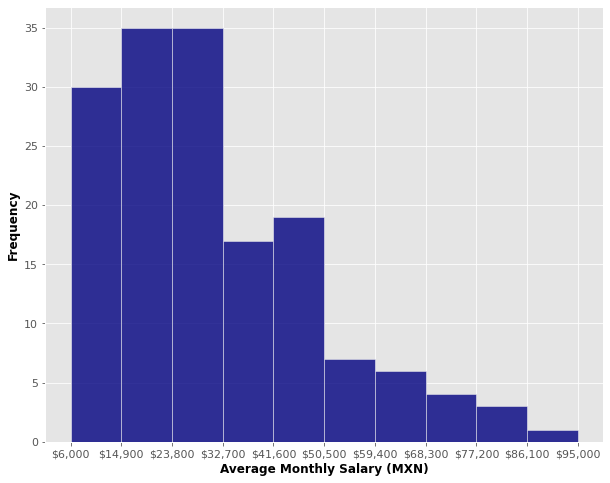

In [32]:
# Salary Distribution
bins = 10
plt.figure(figsize = (10, 8))
ax = sns.histplot(data = salary_df, x = 'Average Salary', 
                 color = 'navy',
                 bins = bins,
                 alpha = 0.8)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xlabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Frequency', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(np.linspace(min(salary_df['Average Salary']),max(salary_df['Average Salary']),bins + 1), fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid({'both'})
plt.show()

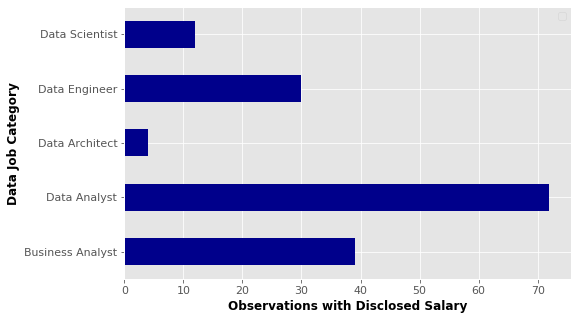

In [33]:
# Count of observations per Data Job Category
obs_per_job = salary_df.groupby('Job')[['Average Salary']].count().plot.barh(color = 'darkblue', figsize = (8, 5))
plt.legend([])
plt.xlabel('Observations with Disclosed Salary', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Data Job Category', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()


It is necessary to be careful with the salary results for the **Data Architect** positions, as very few observations were collected.

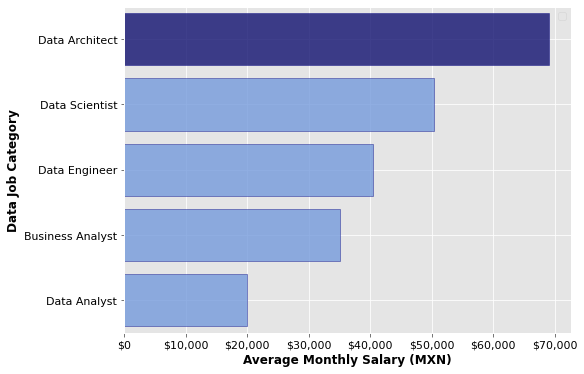

In [34]:
# Average Salary per Data Job Category
salary_per_job = salary_df.groupby('Job')[['Average Salary']].mean().reset_index()
plt.figure(figsize = (8, 6))
ax = sns.barplot(data = salary_per_job, x = 'Average Salary', y = 'Job', 
                 order = ['Data Architect', 'Data Scientist', 'Data Engineer', 'Business Analyst', 'Data Analyst'], 
                 palette = ['navy', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue'],
                 alpha = 0.8, edgecolor='navy')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.legend([])
plt.xlabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Data Job Category', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(color = 'black', fontsize = 11)
plt.yticks(color = 'black', fontsize = 11)
plt.grid({'both'})
plt.show()

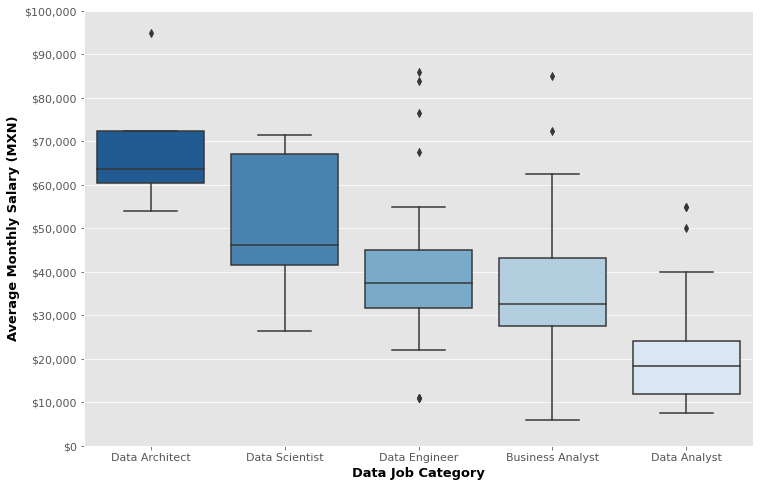

In [35]:
# Box plot for each Data Job Category
plt.figure(figsize = (12,8))
ax = sns.boxplot(data = salary_df, x = 'Job', y = 'Average Salary', 
                 order = ['Data Architect', 'Data Scientist', 'Data Engineer', 'Business Analyst', 'Data Analyst'],
                 palette = 'Blues_r')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 11)
plt.yticks(np.linspace(0,100000,11),fontsize = 11)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 13, color = 'black')
plt.ylabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 13, color = 'black')
plt.show()

## **8. Where the Highest Salaries Can Be Found?**
___

## **9. What Companies Offer the Highest Salaries?**
___

In [36]:
company_salary = pd.pivot_table(salary_df, index = 'Company', columns = 'Job', values = 'Average Salary', aggfunc= 'mean')
company_salary['Total Average'] = company_salary.mean(axis=1, numeric_only= True)

# All companies
company_salary = company_salary.fillna(0).sort_values('Total Average', ascending = False).sort_values('Company', ascending = True)
company_salary.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total Average
Company,,,,,,
"Acepte Soluciones Integrales, S. D...",32500.0,0.000000,0.0,0.0,0.0,32500.000000
Adecco,0.0,34333.333333,0.0,0.0,42250.0,38291.666667
"Aig Seguros Mexico, Sa De C.V.",0.0,27000.000000,0.0,0.0,0.0,27000.000000
Ait Vanguardia Tecnológica S. De R...,37375.0,0.000000,0.0,56950.0,0.0,47162.500000
Alicia Angelica Vazquez Espinoza,0.0,0.000000,0.0,30000.0,0.0,30000.000000


In [37]:
# Top companies
company_salary_top = company_salary.fillna(0).sort_values('Total Average', ascending = False)[:30].sort_values('Company', ascending = True)
company_salary_top.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total Average
Company,,,,,,
Adecco,0.0,34333.333333,0.0,0.0,42250.0,38291.666667
Ait Vanguardia Tecnológica S. De R...,37375.0,0.000000,0.0,56950.0,0.0,47162.500000
Anzen Soluciones S.A. De C.V.,0.0,0.000000,0.0,67500.0,0.0,67500.000000
"Atento Servicios, S. A. De C.V.",0.0,55000.000000,0.0,0.0,0.0,55000.000000
Axented Digital Communications Sa ...,0.0,0.000000,0.0,0.0,69000.0,69000.000000


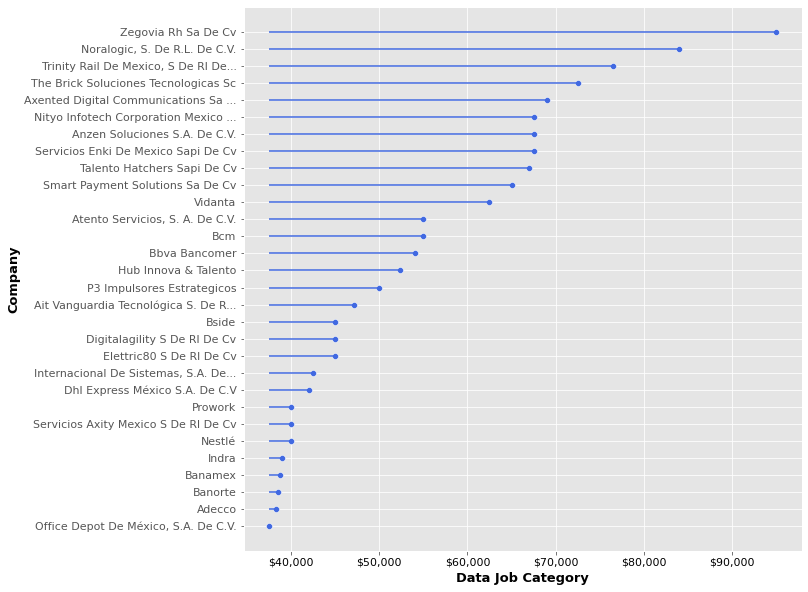

In [54]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = company_salary_top.sort_values('Total Average', ascending= False),
                    x = 'Total Average',
                    y = 'Company',
                    color = 'royalblue'
                    )
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
for index, value in company_salary_top.sort_values('Total Average')['Total Average'].iteritems():
    plt.hlines(xmax = value, xmin = min(company_salary_top['Total Average']), y = index, color='royalblue')  # Stems
plt.xticks(rotation = 0, fontsize = 11, color = 'black')
plt.yticks(fontsize = 11)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 13, color = 'black')
plt.ylabel('Company', weight = 'bold', fontsize = 13, color = 'black')
plt.show()

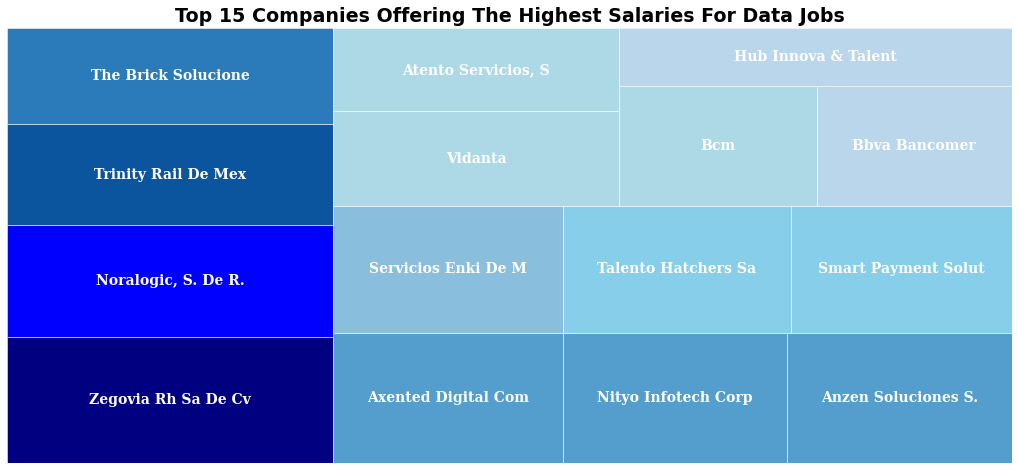

In [53]:
# Treemap
top = 15
hm_company_salary_top = company_salary_top.sort_values('Total Average', ascending = False)[:top]
sizes = hm_company_salary_top['Total Average'].values
label = hm_company_salary_top.index.map(lambda x: x[:19])
colors = sns.color_palette('Blues_r')
colors_tree =['navy', 'blue', colors[0], colors[1], colors[2], colors[2], colors[2], colors[3], 'skyblue', 'skyblue', 'lightblue', 'lightblue', 'lightblue', colors[4], colors[4], colors[4], colors[4]]
plt.figure(figsize = (18,8))
squarify.plot(sizes = sizes, label = label, 
              alpha = 1, color = colors_tree, pad = 0, 
              text_kwargs={'fontsize': 14, 'weight': 'bold', 'family':'serif', 'color': 'w'},
              edgecolor = 'w')
plt.title('Top 15 Companies Offering The Highest Salaries For Data Jobs', weight = 'bold', fontsize = 19)
plt.axis('Off')
plt.show()

## **10. What Companies Offer the Highest Salaries Per Data Job Category?**
___

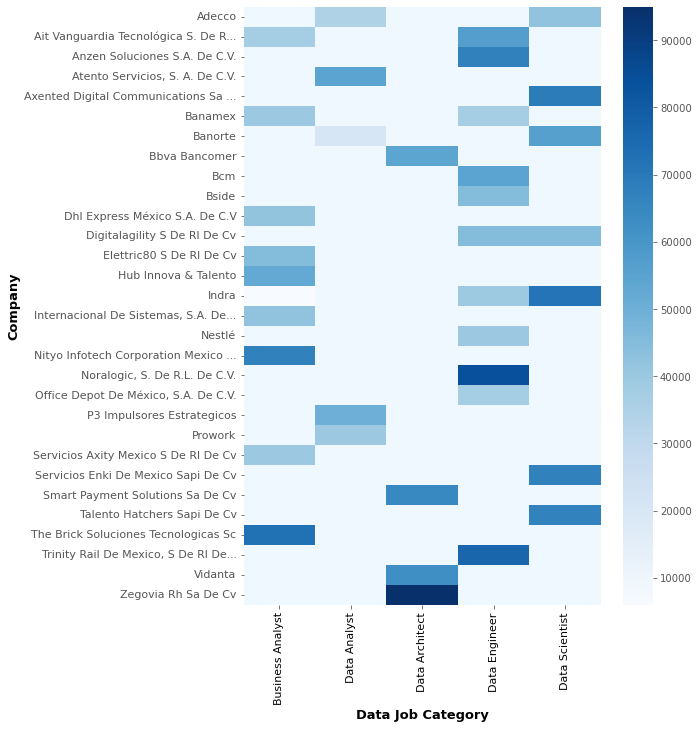

In [39]:
plt.figure(figsize = (8,11))
hm = sns.heatmap(data = company_salary_top.drop(columns = 'Total Average'),
                cmap = 'Blues',
                mask = (company_salary_top.drop(columns = 'Total Average') == 0)
                )
hm.set_facecolor('aliceblue')
plt.xticks(fontsize = 11, color = 'black')
plt.yticks(fontsize = 11)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 13, color = 'black')
plt.ylabel('Company', weight = 'bold', fontsize = 13, color = 'black')
plt.show()

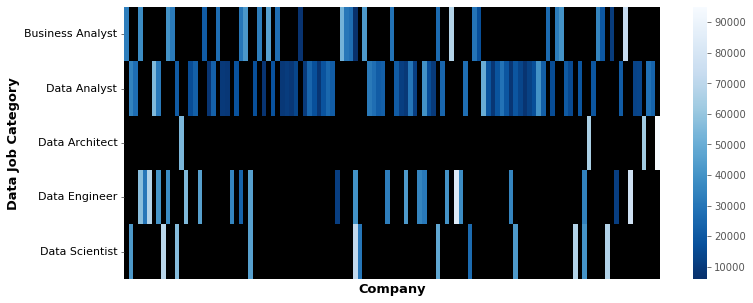

In [41]:
plt.figure(figsize = (12,5))
hm = sns.heatmap(data = company_salary.drop(columns = 'Total Average').transpose(),
                cmap = 'Blues_r',
                mask = (company_salary.drop(columns = 'Total Average').transpose() == 0))
hm.set_facecolor('black')
# ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks([])
plt.yticks(fontsize = 11, color = 'black')
plt.xlabel('Company', weight = 'bold', fontsize = 13, color = 'black')
plt.ylabel('Data Job Category', weight = 'bold', fontsize = 13, color = 'black')
plt.show()